In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from datetime import date, timedelta
from sklearn.metrics import mean_squared_error
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import LSTM

In [2]:
df = pd.read_csv('Dataset_combined/Total_dataset.csv')
df.drop('Unnamed: 0',axis=1,inplace=True)

In [3]:
df

,Timestamp,W
0,2013-05-24 00:00:00,282.744995
1,2013-05-24 00:00:01,288.757996
2,2013-05-24 00:00:02,288.757996
3,2013-05-24 00:00:03,297.394012
4,2013-05-24 00:00:04,303.722992
...,...,...
4391054,2013-08-05 15:33:10,711.764891
4391055,2013-08-05 15:33:11,711.764891
4391056,2013-08-05 15:33:12,711.911695
4391057,2013-08-05 15:33:15,712.182676


In [4]:
df['Day']=pd.to_datetime(df['Timestamp']).dt.dayofweek
df

,Timestamp,W,Day
0,2013-05-24 00:00:00,282.744995,4
1,2013-05-24 00:00:01,288.757996,4
2,2013-05-24 00:00:02,288.757996,4
3,2013-05-24 00:00:03,297.394012,4
4,2013-05-24 00:00:04,303.722992,4
...,...,...,...
4391054,2013-08-05 15:33:10,711.764891,0
4391055,2013-08-05 15:33:11,711.764891,0
4391056,2013-08-05 15:33:12,711.911695,0
4391057,2013-08-05 15:33:15,712.182676,0


In [5]:
df=df[(df.Day == 5) | (df.Day == 6)]
df

,Timestamp,W,Day
78291,2013-05-25 00:00:00,255.188004,5
78292,2013-05-25 00:00:01,255.188004,5
78293,2013-05-25 00:00:02,255.253006,5
78294,2013-05-25 00:00:03,266.376007,5
78295,2013-05-25 00:00:04,266.813995,5
...,...,...,...
4346970,2013-08-04 23:59:53,384.395403,6
4346971,2013-08-04 23:59:54,378.236401,6
4346972,2013-08-04 23:59:56,384.291710,6
4346973,2013-08-04 23:59:57,380.063911,6


In [6]:
df['Hour']=pd.to_datetime(df['Timestamp']).dt.hour
df['Minute']=pd.to_datetime(df['Timestamp']).dt.minute
df['Seconds']=pd.to_datetime(df['Timestamp']).dt.second
df.drop('Timestamp',axis=1,inplace=True)

<ipython-input-6-577b4a9108d6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Hour']=pd.to_datetime(df['Timestamp']).dt.hour
<ipython-input-6-577b4a9108d6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Minute']=pd.to_datetime(df['Timestamp']).dt.minute
<ipython-input-6-577b4a9108d6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org

In [7]:
df

,W,Day,Hour,Minute,Seconds
78291,255.188004,5,0,0,0
78292,255.188004,5,0,0,1
78293,255.253006,5,0,0,2
78294,266.376007,5,0,0,3
78295,266.813995,5,0,0,4
...,...,...,...,...,...
4346970,384.395403,6,23,59,53
4346971,378.236401,6,23,59,54
4346972,384.291710,6,23,59,56
4346973,380.063911,6,23,59,57


In [8]:
scaler = MinMaxScaler(feature_range=(0,1))
df_1=scaler.fit_transform(df)
df_scaled = pd.DataFrame(df_1,columns=df.columns)
df_scaled

,W,Day,Hour,Minute,Seconds
0,0.039832,0.0,0.0,0.0,0.000000
1,0.039832,0.0,0.0,0.0,0.016949
2,0.039843,0.0,0.0,0.0,0.033898
3,0.041579,0.0,0.0,0.0,0.050847
4,0.041647,0.0,0.0,0.0,0.067797
...,...,...,...,...,...
1236316,0.060001,1.0,1.0,1.0,0.898305
1236317,0.059039,1.0,1.0,1.0,0.915254
1236318,0.059984,1.0,1.0,1.0,0.949153
1236319,0.059324,1.0,1.0,1.0,0.966102


In [9]:
X=df_scaled.drop('W',axis=1)
y=df_scaled['W']
X = np.asarray(X).astype(np.float32)
y= np.asarray(y).astype(np.float32)

In [10]:
df_scaled.isnull().sum()

W          0
Day        0
Hour       0
Minute     0
Seconds    0
dtype: int64

In [11]:
training_size=int(len(df)*0.80)
test_size=len(df)-training_size
X_train,y_train,X_test,y_test=df_scaled.iloc[0:training_size,1:5],df_scaled.iloc[0:training_size,0],df_scaled.iloc[training_size:len(df),1:5],df_scaled.iloc[training_size:len(df),0]
X_train=X_train.to_numpy()
y_train=y_train.to_numpy()
X_test=X_test.to_numpy()
y_test=y_test.to_numpy()
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(989056, 4) (989056,) (247265, 4) (247265,)


In [12]:
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test  = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

In [13]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(1,4)))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 1, 50)             11000     
_________________________________________________________________
lstm_1 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 31,251
Trainable params: 31,251
Non-trainable params: 0
_________________________________________________________________


In [14]:
model_history=model.fit(X_train, y_train, batch_size = 128,epochs = 10, validation_data=(X_test,y_test),verbose=1)

Epoch 1/10
7727/7727 [==============================] - 44s 5ms/step - loss: 0.0223 - val_loss: 0.0158
Epoch 2/10
7727/7727 [==============================] - 37s 5ms/step - loss: 0.0167 - val_loss: 0.0126
Epoch 3/10
7727/7727 [==============================] - 37s 5ms/step - loss: 0.0163 - val_loss: 0.0152
Epoch 4/10
7727/7727 [==============================] - 36s 5ms/step - loss: 0.0162 - val_loss: 0.0143
Epoch 5/10
7727/7727 [==============================] - 36s 5ms/step - loss: 0.0162 - val_loss: 0.0128
Epoch 6/10
7727/7727 [==============================] - 37s 5ms/step - loss: 0.0161 - val_loss: 0.0131
Epoch 7/10
7727/7727 [==============================] - 37s 5ms/step - loss: 0.0161 - val_loss: 0.0128
Epoch 8/10
7727/7727 [==============================] - 43s 6ms/step - loss: 0.0161 - val_loss: 0.0141
Epoch 9/10
7727/7727 [==============================] - 38s 5ms/step - loss: 0.0160 - val_loss: 0.0134
Epoch 10/10
7727/7727 [==============================] - 40s 5ms/step - l

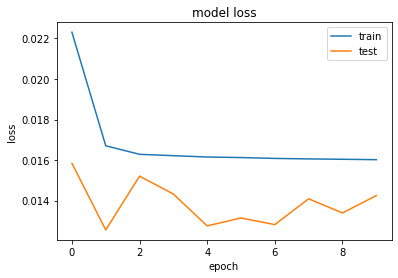

In [15]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [16]:
size = df.shape[1]

In [17]:
yhat = model.predict(X_test)

In [18]:
X_test = X_test.reshape(X_test.shape[0], X_test.shape[2])

In [19]:
inv_yhat = np.concatenate((yhat, X_test[:, 1-size:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
inv_yhat.shape

(247265,)

In [20]:
# invert scaling for actual
y_test = y_test.reshape((len(y_test), 1))
inv_y = np.concatenate((y_test, X_test[:, 1-size:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
inv_y.shape

(247265,)

In [21]:
rmse = np.sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 764.693


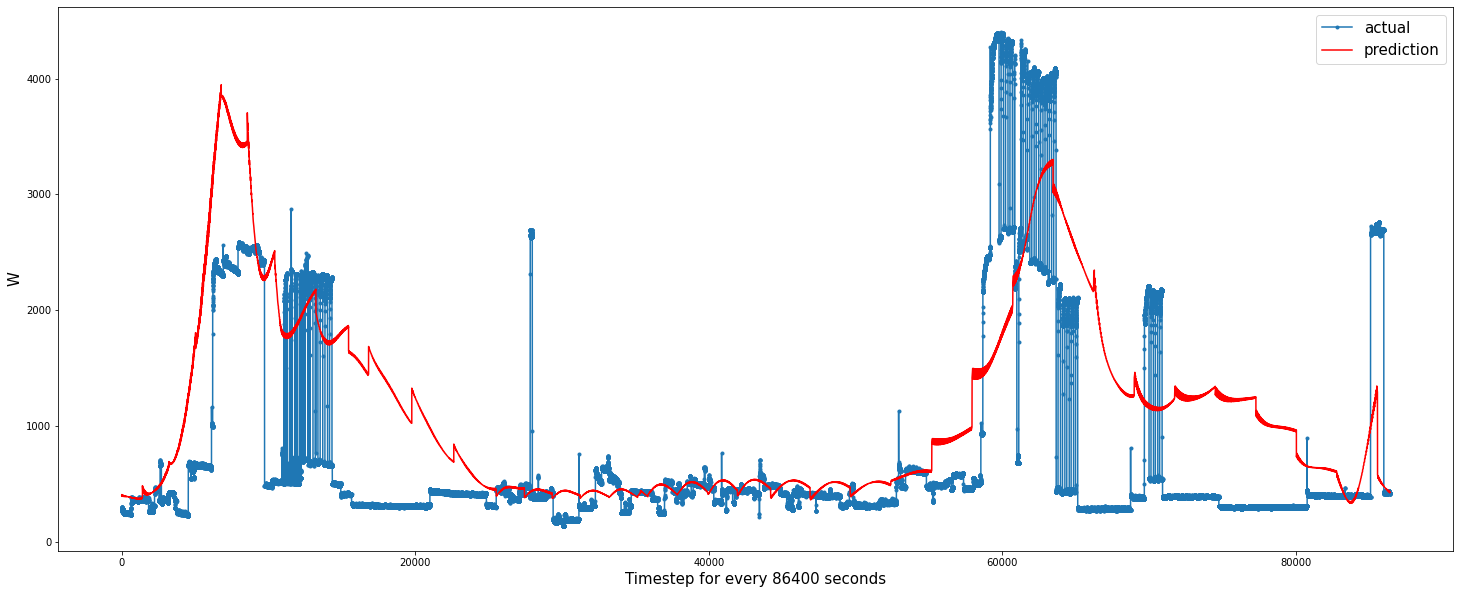

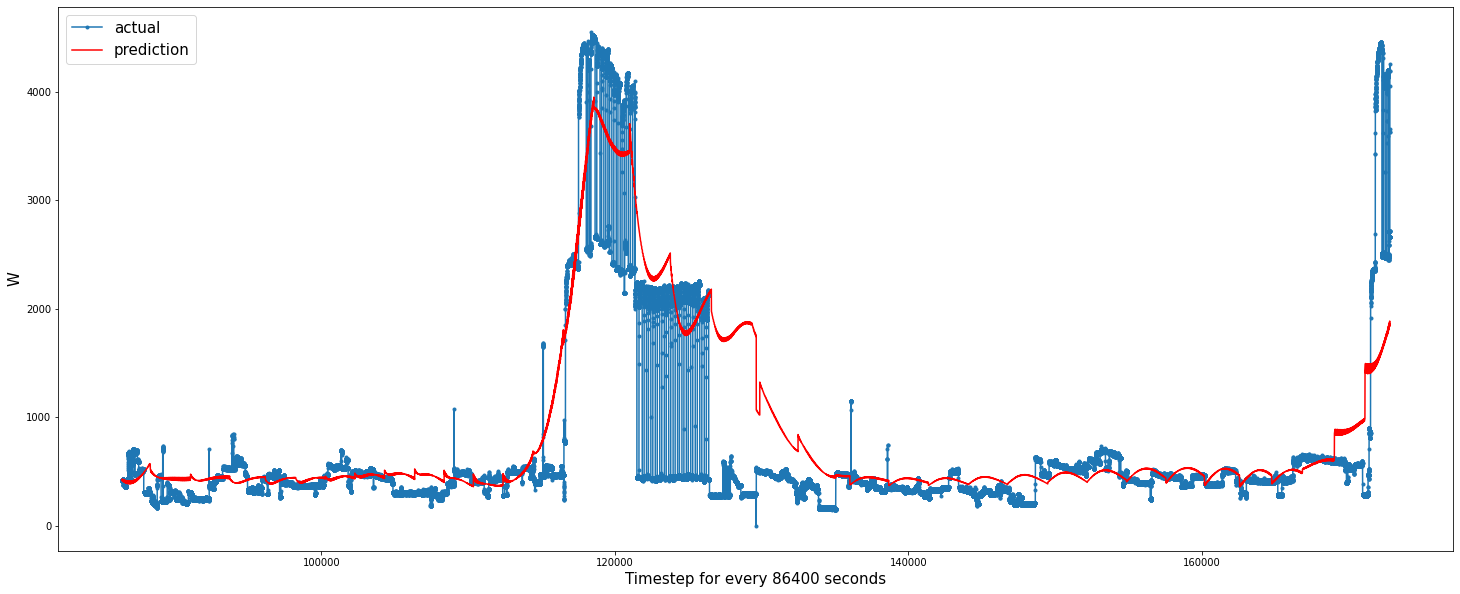

In [22]:
y=0
for i in range(86400,247265,86400):
    aa=[x for x in range(y,i)]
    plt.figure(figsize=(25,10)) 
    plt.plot(aa, inv_y[y:i], marker='.', label="actual")
    plt.plot(aa, inv_yhat[y:i], 'r', label="prediction")
    y = i
    plt.ylabel(df.columns[0], size=15)
    plt.xlabel('Timestep for every 86400 seconds', size=15)
    plt.legend(fontsize=15)
    plt.show()

In [23]:
model.save('Models/weekend_model_prediction.h5')